# 神经网络-矩阵运算

目前的机器学习算法中，深度学习无疑是最厉害之一，而深度学习的核心基础是矩阵运算。

其实，Numpy 是上个时代的产物，它基本上所有的优化都是基于 CPU 的优化，而现在的深度学习，大多都要利用到 GPU 甚至是 TPU 的计算单元。 所以有很多操作，Numpy 是不擅长的。但是像 Tensorflow，Pytorch 这种深度学习库，在很大程度上都是借鉴了 Numpy 而开发的。

所以，我们可以利用 Numpy 来实现一些简单的神经网络，但是在实际应用中，我们还是需要更高效的矩阵运算库，比如 TensorFlow，Pytorch 等。

自己开发不依赖于 Tensorflow 和 Pytorch 的深度学习的项目，建议从 Numpy 入手。（比如遗传算法）
Tensorflow 和 Pytorch 能实现的项目，就尽量用它们开发，Numpy 在深度学习上的功能，和 GPU 的加速上，都不占优势。


In [4]:
#回顾矩阵运算

import numpy as np
data = np.random.rand(4, 3)
weights = np.random.rand(3, 2)
output = np.dot(data, weights)

print("data shape:", data.shape)
print("weights shape:", weights.shape)
print("output shape:", output.shape)


data shape: (4, 3)
weights shape: (3, 2)
output shape: (4, 2)


### 神经网络的分类与回归

神经网络是怎么样进行前向传播的？

在前向传播（计算最终结果）时，我们得首先弄清楚自己处理的是一个回归问题（预测事物的值）还是分类问题（预测事物的类别）。

我们就先说回归问题吧。其实回归比较简单，假设我们要利用 model 预测一个 student 的期末考成绩（score）多少。

In [5]:
student = np.array([[1,2,3]])
model = np.random.rand(3, 1)
score = np.dot(student, model)

print(score)

# 这个 score 打印出来，就是模型预测的分数了。注意了，这个 student 数据是我随便编的，它有三个特征值，可能可以代表前几次考试的成绩。model 里安放的是模型的权重值等，而 score 就是计算得出的预测分数了。

[[3.91911814]]


那分类怎么搞呢？一般来说，我们还是和上面差不多，如果是二分类，就在矩阵点乘后，对出来的值做二次加工，让它能间接地表示类别信息。这个二次加工通常是经过一次 sigmoid 运算，可以看到下图。

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

student = np.array([[0.1,0.2,-0.3]])
model = np.random.rand(3, 1)
output = np.dot(student, model)

# 用 level 表示是否及格
result = sigmoid(output)
if result < 0.5:
    level = "不及格"
else:
    level = "及格"
print(level)


# 如果计算出来的值大于 0.5，在右半边，我们就认为是类别 1， 如果小于 0.5，在左半边，我们就认为是类别 0。

及格


### 多层神经网络前向
上面其实更像是一个感知机模型或者是线性回归模型，他们都是最为基础的神经网络架构，我们现在就来用神经网络的思路构建模型。

上面我们只添加了权重（weights），还没有添加偏置（bias）。简单来说，权重和偏置都是神经网络的参数。 有了这些东西，一个神经网络才能被训练，自我学习。

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def draw_scatter(x, y):
    plt.scatter(x.ravel(), y.ravel())
    plt.show()

x 是在 [-1, 1] 之间均匀分布的10个数，形状为 [10, 1]，可以看作是一个特征的数据集。

y 是基于 x 生成的，加入了一些噪声，用于模拟真实数据中的不确定性。

1. 神经网络的结构

第一层:每个输入数据被映射为3个输出特征。

第二层:每个输入数据被映射为1个输出特征。

2. 权重和偏置的作用

权重：是用来控制输入与输出之间的关系。不同的权重可以学习到不同的特征映射关系。

偏置：是用来平移映射关系的。这些偏置可以使模型更灵活，更好地拟合数据。

3. 模型的输出

从本质上来说，这个简单的神经网络将输入 x 映射成一个新的输出 o，这个输出是 x 经过某种线性变换（加上非线性激活函数的话，还可能是非线性的）后得到的。

4. 理解输出结果 

如果没有激活函数（比如 ReLU、sigmoid 等），这个网络是一个线性映射，最终输出 o 是 x 通过一系列线性变换得到的。也就是说，输出 o 可以看作是输入 x 的一个加权和偏移。

具体的关系取决于权重和偏置的初始值。

第一层出来后的 shape: (10, 3)
第二层出来后的 shape: (10, 1)
output: [[0.08240643]
 [0.08478146]
 [0.08715648]
 [0.0895315 ]
 [0.09190653]
 [0.09428155]
 [0.09665658]
 [0.0990316 ]
 [0.10140662]
 [0.10378165]]


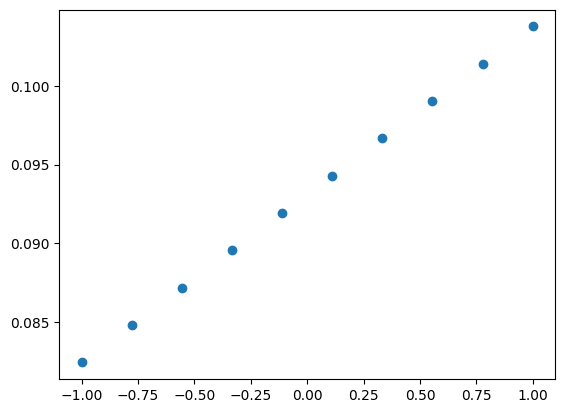

In [11]:
# 数据, 10组，每组一个特征
x = np.linspace(-1, 1, 10)[:, None]     # 生成一个形状为 [10, 1] 的数组，x 在 -1 到 1 之间均匀分布。
y = np.random.normal(loc=0, scale=0.2, size=[10, 1]) + x   

# 生成一个形状为 [10, 1] 的 y 数据，这个数据是在 x 的基础上加上了一些正态分布的噪声，噪声的均值为 0，标准差为 0.2。

#  构建两层模型
def layer(in_dim, out_dim):
    weights = np.random.normal(loc=0, scale=0.1, size=[in_dim, out_dim])
    bias = np.full([1, out_dim], 0.1)
    return {"w": weights, "b": bias}

# 模型
l1 = layer(1, 3)
l2 = layer(3, 1)

# 计算
o = x.dot(l1["w"]) + l1["b"]
print("第一层出来后的 shape:", o.shape)

o = o.dot(l2["w"]) + l2["b"]
print("第二层出来后的 shape:", o.shape)

print("output:", o)
draw_scatter(x, o)


### 激活函数

神经网络除了用 weights 和 bias 来加工数据，还有一个非常重要的能力，就是处理复杂（非线性）数据的预测。同样，非线性函数，我们在神经网络中， 就称为激活函数。

(10, 1)


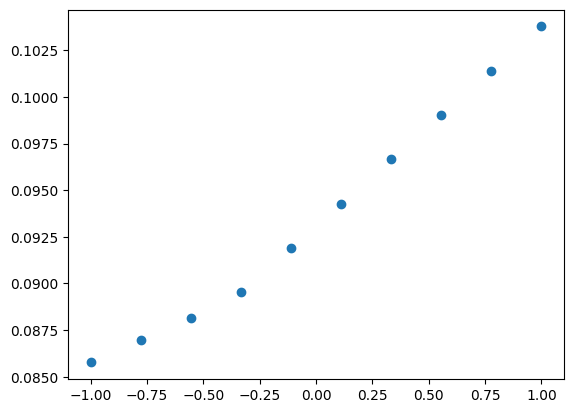

In [31]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# 第一层
o = x.dot(l1["w"]) + l1["b"]

# 可以在这里添加激活函数，增强非线性拟合能力
o = relu(o)

# 第二层
o = o.dot(l2["w"]) + l2["b"]

print(o.shape)
draw_scatter(x, o)

# 上面出来的图，很明显已经经历过一次弯曲（非线性）变化了， 这就是激活函数的作用。